In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import model_from_yaml


seed=9
np.random.seed(seed)

In [16]:
def read_cvs_dataset(ficheiro, col_label):
    dataset = np.loadtxt(ficheiro, delimiter=",")
    print('Formato do dataset: ',dataset.shape)
    input_attributes= dataset[:,0:col_label]
    output_attributes= dataset[:,col_label]
    print('Formato das variáveis de entrada (input variables): ',input_attributes.shape)
    print('Formato das classe de saída (output variables): ',output_attributes.shape)
    #print(X[0])
    #print(Y[0])
    return(input_attributes,output_attributes)

In [17]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=8, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(8, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))
    return model

In [18]:
def print_model(model,fich):
    from tensorflow.keras.utils import plot_model
    
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)

In [19]:
def compile_model(model):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
def fit_model(model, input_attributes, output_attributes):
    history = model.fit(input_attributes, output_attributes, validation_split=0.33, 
                        epochs=450, batch_size=32, verbose=2)
    return history

In [21]:
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [22]:
def model_evaluate(model,input_attributes,output_attributes):
    print("###########inicio do evaluate###############################\n")
    scores = model.evaluate(input_attributes, output_attributes)
    print("\n metrica: %s: %.2f%%\n"% (model.metrics_names[1], scores[1]*100))

In [23]:
def model_print_predictions(model,input_attributes,output_attributes):
    previsoes= model.predict(input_attributes) # arredondar para 0 ou 1 pois pretende-se um output binário
    LP = [round(prev[0]) for prev in previsoes]
    for i in range(len(output_attributes)):
        print(" Class:",output_attributes[i]," previsão:",LP[i])
        if i>10:
            break

In [24]:
def ciclo_completo():
    (input_attributes,output_attributes) = read_cvs_dataset("pima-indians-diabetes.csv", 8)
    model = create_model()
    print_model(model,"model_MLP.png")
    compile_model(model)
    history=fit_model(model,input_attributes,output_attributes)
    
    print_history_accuracy(history)
    print_history_loss(history)
    
    model_evaluate(model,input_attributes,output_attributes)
    model_print_predictions(model,input_attributes,output_attributes)

In [25]:
def save_model_json(model,fich):
    model_json= model.to_json()
    with open(fich, "w") as json_file:
        json_file.write(model_json)
        
def save_model_yaml(model,fich):
    model_yaml= model.to_yaml()
    with open(fich, "w") as yaml_file:
        yaml_file.write(model_yaml)
        
def save_weights_hdf5(model,fich):
    model.save_weights(fich)
    print("Saved model to disk")

In [26]:
def load_model_json(fich):
    json_file = open(fich, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    return loaded_model


def load_model_yaml(fich):
    yaml_file= open(fich, 'r')
    loaded_model_yaml= yaml_file.read()
    yaml_file.close()
    
    return model_from_yaml(loaded_model_yaml)

def load_weights_hdf5(model,fich):
    model.load_weights(fich)
    print("Loaded model from disk")

In [27]:
def ciclo_ler_dataset_treinar_gravar():
    (input_attributes,output_attributes) = read_cvs_dataset("pima-indians-diabetes.csv",8)
    model = create_model()
    print_model(model,"model2.png")
    compile_model(model)
    history=fit_model(model,input_attributes,output_attributes)
    print_history_accuracy(history)
    print_history_loss(history)
    model_evaluate(model,input_attributes,output_attributes)
    save_model_json(model,"model.json")
    save_weights_hdf5(model,"model.h5")
    
    return(input_attributes,output_attributes)

def ciclo_ler_modelo_evaluate_usar(input_attributes,output_attributes):
    model= load_model_json("model.json")
    load_weights_hdf5(model,"model.h5")
    compile_model(model)
    model_evaluate(model,input_attributes,output_attributes)
    model_print_predictions(model,input_attributes,output_attributes)

Formato do dataset:  (768, 9)
Formato das variáveis de entrada (input variables):  (768, 8)
Formato das classe de saída (output variables):  (768,)
Train on 514 samples, validate on 254 samples
Epoch 1/450
514/514 - 1s - loss: 0.6920 - accuracy: 0.6167 - val_loss: 0.6895 - val_accuracy: 0.6732
Epoch 2/450
514/514 - 0s - loss: 0.6894 - accuracy: 0.6401 - val_loss: 0.6858 - val_accuracy: 0.6732
Epoch 3/450
514/514 - 0s - loss: 0.6857 - accuracy: 0.6401 - val_loss: 0.6771 - val_accuracy: 0.6732
Epoch 4/450
514/514 - 0s - loss: 0.6807 - accuracy: 0.6401 - val_loss: 0.6753 - val_accuracy: 0.6732
Epoch 5/450
514/514 - 0s - loss: 0.6760 - accuracy: 0.6401 - val_loss: 0.6660 - val_accuracy: 0.6732
Epoch 6/450
514/514 - 0s - loss: 0.6695 - accuracy: 0.6401 - val_loss: 0.6580 - val_accuracy: 0.6732
Epoch 7/450
514/514 - 0s - loss: 0.6652 - accuracy: 0.6401 - val_loss: 0.6505 - val_accuracy: 0.6732
Epoch 8/450
514/514 - 0s - loss: 0.6662 - accuracy: 0.6265 - val_loss: 0.6561 - val_accuracy: 0.669

Epoch 80/450
514/514 - 0s - loss: 0.5621 - accuracy: 0.7140 - val_loss: 0.5735 - val_accuracy: 0.6969
Epoch 81/450
514/514 - 0s - loss: 0.5590 - accuracy: 0.7160 - val_loss: 0.5703 - val_accuracy: 0.6850
Epoch 82/450
514/514 - 0s - loss: 0.5565 - accuracy: 0.7296 - val_loss: 0.5752 - val_accuracy: 0.6772
Epoch 83/450
514/514 - 0s - loss: 0.5575 - accuracy: 0.7179 - val_loss: 0.5787 - val_accuracy: 0.6654
Epoch 84/450
514/514 - 0s - loss: 0.5546 - accuracy: 0.7218 - val_loss: 0.5727 - val_accuracy: 0.6969
Epoch 85/450
514/514 - 0s - loss: 0.5579 - accuracy: 0.7160 - val_loss: 0.5683 - val_accuracy: 0.6969
Epoch 86/450
514/514 - 0s - loss: 0.5566 - accuracy: 0.7257 - val_loss: 0.5715 - val_accuracy: 0.6772
Epoch 87/450
514/514 - 0s - loss: 0.5695 - accuracy: 0.6965 - val_loss: 0.5673 - val_accuracy: 0.6614
Epoch 88/450
514/514 - 0s - loss: 0.5664 - accuracy: 0.7101 - val_loss: 0.5850 - val_accuracy: 0.6535
Epoch 89/450
514/514 - 0s - loss: 0.5784 - accuracy: 0.7082 - val_loss: 0.5846 - v

Epoch 160/450
514/514 - 0s - loss: 0.5324 - accuracy: 0.7374 - val_loss: 0.5351 - val_accuracy: 0.7323
Epoch 161/450
514/514 - 0s - loss: 0.5126 - accuracy: 0.7529 - val_loss: 0.5201 - val_accuracy: 0.7441
Epoch 162/450
514/514 - 0s - loss: 0.5117 - accuracy: 0.7529 - val_loss: 0.5176 - val_accuracy: 0.7638
Epoch 163/450
514/514 - 0s - loss: 0.5094 - accuracy: 0.7549 - val_loss: 0.5321 - val_accuracy: 0.7598
Epoch 164/450
514/514 - 0s - loss: 0.5155 - accuracy: 0.7529 - val_loss: 0.5217 - val_accuracy: 0.7559
Epoch 165/450
514/514 - 0s - loss: 0.5154 - accuracy: 0.7451 - val_loss: 0.5224 - val_accuracy: 0.7598
Epoch 166/450
514/514 - 0s - loss: 0.5083 - accuracy: 0.7568 - val_loss: 0.5265 - val_accuracy: 0.7638
Epoch 167/450
514/514 - 0s - loss: 0.5094 - accuracy: 0.7646 - val_loss: 0.5168 - val_accuracy: 0.7441
Epoch 168/450
514/514 - 0s - loss: 0.5036 - accuracy: 0.7588 - val_loss: 0.5142 - val_accuracy: 0.7638
Epoch 169/450
514/514 - 0s - loss: 0.5045 - accuracy: 0.7471 - val_loss: 

Epoch 240/450
514/514 - 0s - loss: 0.4766 - accuracy: 0.7685 - val_loss: 0.4913 - val_accuracy: 0.7835
Epoch 241/450
514/514 - 0s - loss: 0.4870 - accuracy: 0.7626 - val_loss: 0.5101 - val_accuracy: 0.7874
Epoch 242/450
514/514 - 0s - loss: 0.4771 - accuracy: 0.7568 - val_loss: 0.4887 - val_accuracy: 0.7795
Epoch 243/450
514/514 - 0s - loss: 0.4782 - accuracy: 0.7646 - val_loss: 0.4941 - val_accuracy: 0.7559
Epoch 244/450
514/514 - 0s - loss: 0.4767 - accuracy: 0.7646 - val_loss: 0.5183 - val_accuracy: 0.7559
Epoch 245/450
514/514 - 0s - loss: 0.4708 - accuracy: 0.7802 - val_loss: 0.4995 - val_accuracy: 0.7717
Epoch 246/450
514/514 - 0s - loss: 0.4646 - accuracy: 0.7821 - val_loss: 0.4948 - val_accuracy: 0.7717
Epoch 247/450
514/514 - 0s - loss: 0.4762 - accuracy: 0.7665 - val_loss: 0.5132 - val_accuracy: 0.7598
Epoch 248/450
514/514 - 0s - loss: 0.4736 - accuracy: 0.7763 - val_loss: 0.5056 - val_accuracy: 0.7520
Epoch 249/450
514/514 - 0s - loss: 0.4743 - accuracy: 0.7899 - val_loss: 

Epoch 320/450
514/514 - 0s - loss: 0.4463 - accuracy: 0.7918 - val_loss: 0.4849 - val_accuracy: 0.7795
Epoch 321/450
514/514 - 0s - loss: 0.4684 - accuracy: 0.7782 - val_loss: 0.4868 - val_accuracy: 0.7598
Epoch 322/450
514/514 - 0s - loss: 0.4727 - accuracy: 0.7626 - val_loss: 0.4952 - val_accuracy: 0.7835
Epoch 323/450
514/514 - 0s - loss: 0.4513 - accuracy: 0.7840 - val_loss: 0.4962 - val_accuracy: 0.7480
Epoch 324/450
514/514 - 0s - loss: 0.4722 - accuracy: 0.7743 - val_loss: 0.5042 - val_accuracy: 0.7638
Epoch 325/450
514/514 - 0s - loss: 0.4529 - accuracy: 0.7782 - val_loss: 0.4835 - val_accuracy: 0.7795
Epoch 326/450
514/514 - 0s - loss: 0.4543 - accuracy: 0.7763 - val_loss: 0.4811 - val_accuracy: 0.7874
Epoch 327/450
514/514 - 0s - loss: 0.4477 - accuracy: 0.7860 - val_loss: 0.4830 - val_accuracy: 0.7835
Epoch 328/450
514/514 - 0s - loss: 0.4425 - accuracy: 0.7957 - val_loss: 0.4816 - val_accuracy: 0.7795
Epoch 329/450
514/514 - 0s - loss: 0.4388 - accuracy: 0.7879 - val_loss: 

Epoch 400/450
514/514 - 0s - loss: 0.4410 - accuracy: 0.7840 - val_loss: 0.4921 - val_accuracy: 0.7677
Epoch 401/450
514/514 - 0s - loss: 0.4439 - accuracy: 0.7840 - val_loss: 0.4809 - val_accuracy: 0.7874
Epoch 402/450
514/514 - 0s - loss: 0.4272 - accuracy: 0.7996 - val_loss: 0.4789 - val_accuracy: 0.7835
Epoch 403/450
514/514 - 0s - loss: 0.4367 - accuracy: 0.7840 - val_loss: 0.4721 - val_accuracy: 0.7795
Epoch 404/450
514/514 - 0s - loss: 0.4504 - accuracy: 0.7802 - val_loss: 0.4791 - val_accuracy: 0.7913
Epoch 405/450
514/514 - 0s - loss: 0.4544 - accuracy: 0.7821 - val_loss: 0.4970 - val_accuracy: 0.7835
Epoch 406/450
514/514 - 0s - loss: 0.4334 - accuracy: 0.7938 - val_loss: 0.4742 - val_accuracy: 0.7795
Epoch 407/450
514/514 - 0s - loss: 0.4445 - accuracy: 0.7802 - val_loss: 0.4820 - val_accuracy: 0.7874
Epoch 408/450
514/514 - 0s - loss: 0.4311 - accuracy: 0.7938 - val_loss: 0.4782 - val_accuracy: 0.7717
Epoch 409/450
514/514 - 0s - loss: 0.4323 - accuracy: 0.7938 - val_loss: 

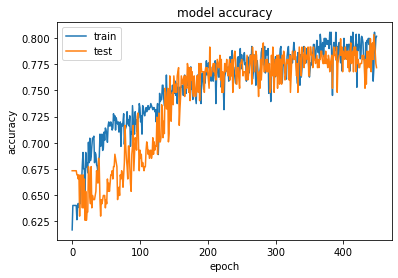

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


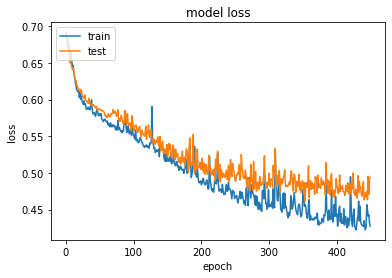

###########inicio do evaluate###############################

768/768 [==============================] - 0s 147us/sample - loss: 0.4456 - accuracy: 0.7956

 metrica: accuracy: 79.56%

Saved model to disk
Loaded model from disk
###########inicio do evaluate###############################

768/768 [==============================] - 0s 156us/sample - loss: 0.4456 - accuracy: 0.7956

 metrica: accuracy: 79.56%

 Class: 1.0  previsão: 0.0
 Class: 0.0  previsão: 0.0
 Class: 1.0  previsão: 1.0
 Class: 0.0  previsão: 0.0
 Class: 1.0  previsão: 1.0
 Class: 0.0  previsão: 0.0
 Class: 1.0  previsão: 0.0
 Class: 0.0  previsão: 1.0
 Class: 1.0  previsão: 1.0
 Class: 1.0  previsão: 0.0
 Class: 0.0  previsão: 0.0
 Class: 1.0  previsão: 1.0


In [32]:
if __name__ == '__main__':
    #opção1 -ciclocompleto
    #ciclo_completo()
    #opção 2 -ler,treinaro dataset e gravar. Depois ler o modelo e pesos e usar
    (input_attributes,output_attributes)=ciclo_ler_dataset_treinar_gravar()
    #(input_attributes, output_attributes)=read_cvs_dataset("pima-indians-diabetes.csv",8)
    ciclo_ler_modelo_evaluate_usar(input_attributes,output_attributes)